# IMPORT

In [ ]:
import statsmodels
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Importing Predefined formulas file with a lot of functions used in the given code
from formulas import *
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
keras = tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# LOADING DATASET

In [ ]:
# Read data in to dataframes
tsla = pd.read_csv('SPY.csv')

# Change date column to datetime type
tsla['Date'] = pd.to_datetime(tsla['Date'])

In [ ]:
tsla.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.0
mean,117.769463,118.460657,117.001314,117.768581,8.469169e+07,0.010456,0.0
std,75.024680,75.375253,74.633941,75.026678,9.689695e+07,0.093330,0.0
min,25.760000,25.840000,25.410000,25.760000,5.200000e+03,0.000000,0.0
25%,71.097500,71.777500,70.370000,71.160000,7.727000e+06,0.000000,0.0
50%,93.860000,94.595000,93.125000,93.795000,5.814275e+07,0.000000,0.0
75%,156.007500,156.772500,155.350000,155.992500,1.213916e+08,0.000000,0.0
max,363.970000,364.380000,355.060000,356.670000,8.710263e+08,1.570000,0.0


In [ ]:
tsla.tail(100)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6900,2020-06-24,308.60,309.27,300.90,302.88,132813500,0.0,0
6901,2020-06-25,302.26,306.41,300.08,306.12,89468000,0.0,0
6902,2020-06-26,304.94,305.17,298.23,298.85,127961000,0.0,0
6903,2020-06-29,300.21,303.40,297.74,303.25,79773300,0.0,0
6904,2020-06-30,302.78,308.96,302.61,307.13,113394800,0.0,0
...,...,...,...,...,...,...,...,...
6995,2020-11-06,349.93,351.51,347.65,350.16,74973000,0.0,0
6996,2020-11-09,363.97,364.38,354.06,354.56,172304200,0.0,0
6997,2020-11-10,353.49,355.18,350.51,354.04,85552000,0.0,0
6998,2020-11-11,356.40,357.56,355.06,356.67,58316400,0.0,0


In [ ]:
#drop if any null Values
tsla.dropna(inplace=True)

In [ ]:
# Read in data
spy = pd.read_csv('SPY.csv')

# Convert series into datetime type
spy['Date'] = pd.to_datetime(spy['Date'])

# Save target series
series = spy['Close']

# Create train data set
train_split_date = '2014-12-31'
train_split_index = np.where(spy.Date == train_split_date)[0][0]
x_train = spy.loc[spy['Date'] <= train_split_date]['Close']

# Create test data set
test_split_date = '2019-01-02'
test_split_index = np.where(spy.Date == test_split_date)[0][0]
x_test = spy.loc[spy['Date'] >= test_split_date]['Close']

# Create valid data set
valid_split_index = (train_split_index.max(),test_split_index.min())
x_valid = spy.loc[(spy['Date'] < test_split_date) & (spy['Date'] > train_split_date)]['Close']

5521 5522 6527 6528 6999


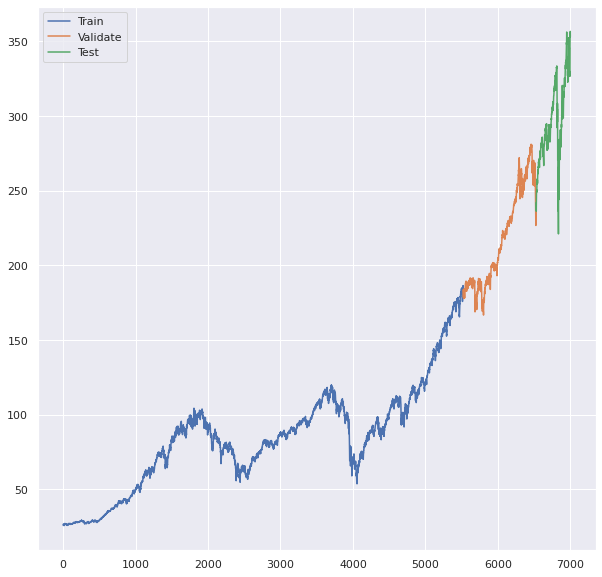

In [ ]:
# set style of charts
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [10, 10]

# Plot all lines on one chart to see where one segment starts and another ends
plt.plot(x_train, label = 'Train')
plt.plot(x_valid, label = 'Validate')
plt.plot(x_test, label = 'Test')
plt.legend()
print(x_train.index.max(),x_valid.index.min(),x_valid.index.max(),x_test.index.min(),x_test.index.max())

# Base Model- Naive Forecasting

Text(0.5, 1.0, 'Price History of SPY Jan-1993 to Aug-2022')

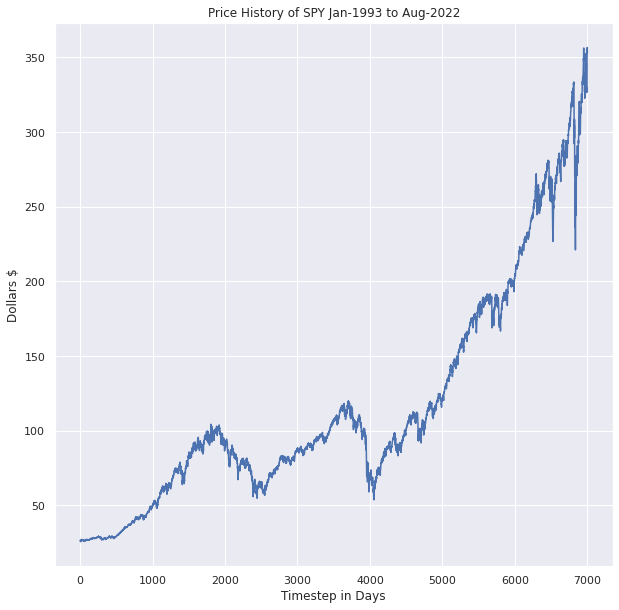

In [ ]:
# Plot chart with all details untouched
fig, ax = plt.subplots()

# Add the time-series for "Close value" to the plot
ax.plot(tsla.index, tsla["Close"], label = 'TSLA Close Price');
# Set the x-axis label
ax.set_xlabel("Timestep in Days");
# Set the y-axis label
ax.set_ylabel("Dollars $");
plt.title('Price History of SPY Jan-1993 to Aug-2022')

In [ ]:
naive_forecast = series[test_split_index-1 :-1]

In [ ]:
naive_forecast.shape

(472,)

Text(0.5, 1.0, 'Naive Forecast vs Actual')

<Figure size 720x432 with 0 Axes>

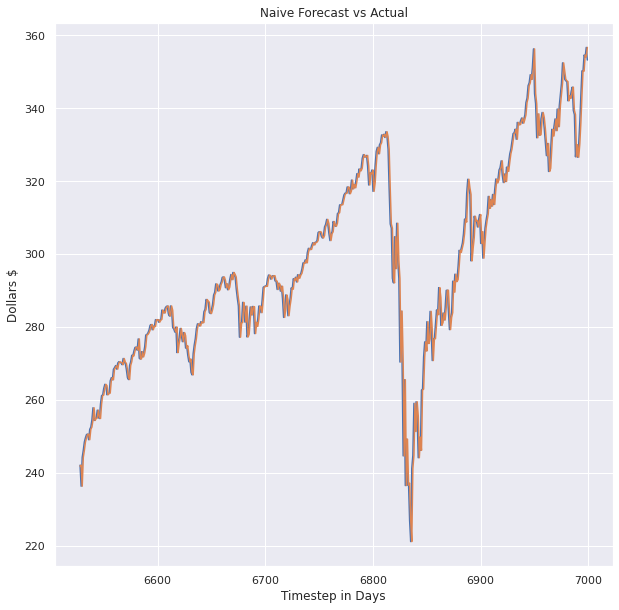

In [ ]:
plt.figure(figsize=(10, 6))
# Plot chart with all details untouched
fig, ax = plt.subplots()
# Add the time-series for "relative_temp" to the plot
ax.plot(x_test.index, x_test, label = 'Actual');
ax.plot(x_test.index, naive_forecast, label="Forecast");
plt.ylabel('Dollars $');
plt.xlabel('Timestep in Days');
plt.title('Naive Forecast vs Actual')

Calculating error in Naive Model

In [ ]:
# Alternative way to show MAE to stay consistent with what we will be doing later
naive_forecast_mae = keras.metrics.mean_absolute_error(x_test, naive_forecast).numpy()
model_mae_scores = {'naive' : naive_forecast_mae}

# view the dictionary of mae scores
model_mae_scores

{'naive': 2.8301271186440666}

In [ ]:
# Show first 3 values of our forecast
print(naive_forecast.values[:3])

# Show first 3 values of validation data
print(x_test.values[:3])

# Calculate and show first 3 values of the calculated error (MAE)
print('*'*100)
print(np.abs(naive_forecast[:3].values - x_test[:3].values))

[241.81 242.06 236.28]
[242.06 236.28 244.2 ]
****************************************************************************************************
[0.25 5.78 7.92]


# Extending Naive to Monthly Moving Average Model (20 Days)

Text(0.5, 1.0, 'SMA20 vs Actual')

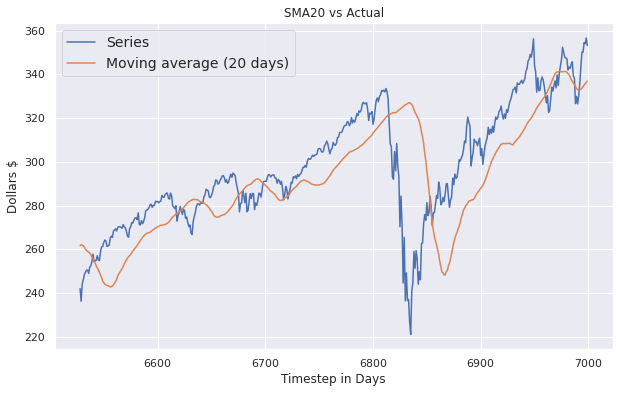

In [ ]:
# Choose a window size for the moving average
window = 20

# Create a moving average over the entire dataset
moving_avg = tsla['Close'].rolling(window=window).mean()

# Slice the moving average on the forecast
moving_avg_forecast = moving_avg.values[test_split_index - window:tsla.index.max() - window + 1]
                                         
plt.figure(figsize=(10, 6))
plot_series(x_test.index, x_test, label="Series")
plot_series(x_test.index, moving_avg_forecast, label="Moving average (20 days)")
plt.ylabel('Dollars $')
plt.xlabel('Timestep in Days')
plt.title('SMA20 vs Actual')

In [ ]:
ma_20 = keras.metrics.mean_absolute_error(x_test, moving_avg_forecast).numpy()

model_mae_scores['SMA 20'] = ma_20
model_mae_scores

{'naive': 2.8301271186440666, 'SMA 20': 15.930386652542373}

**Weekely moving average (5day)**.We have modeled a 20 day moving average and a 5 day moving average. This is because there are only 5 trading days a week which means 20 trading in a month. So these two moving averages show the weekly trend and the monthly trends 

Text(0.5, 1.0, 'SMA5 Forecast vs Actual')

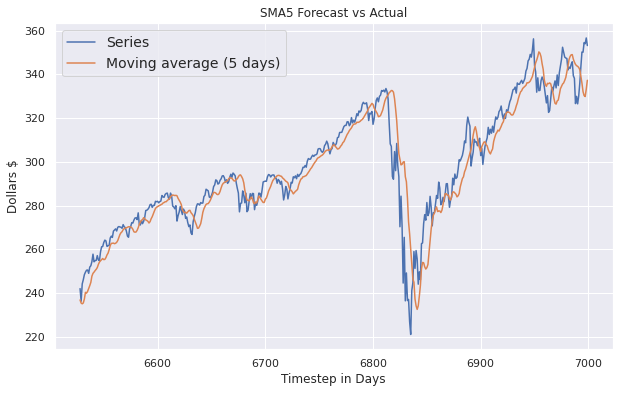

In [ ]:
# Choose a window size for the moving average
window = 5

# Create a moving average over the entire dataset
moving_avg = tsla['Close'].rolling(window=window).mean()

# Slice the moving average on the forecast
moving_avg_forecast = moving_avg.values[test_split_index - window:tsla.index.max() - window + 1]
                                         
plt.figure(figsize=(10, 6))
plot_series(x_test.index, x_test, label="Series")
plot_series(x_test.index, moving_avg_forecast, label="Moving average (5 days)")
plt.ylabel('Dollars $')
plt.xlabel('Timestep in Days')
plt.title('SMA5 Forecast vs Actual')

In [ ]:
# Calculate MAE
ma_5 = keras.metrics.mean_absolute_error(x_test, moving_avg_forecast).numpy()

# Save to our dictionary of model mae scores
model_mae_scores['SMA 5'] = ma_5
model_mae_scores

{'naive': 2.8301271186440666,
 'SMA 20': 15.930386652542373,
 'SMA 5': 7.069838983050845}

# ARIMA

Checking if the given data is stationary

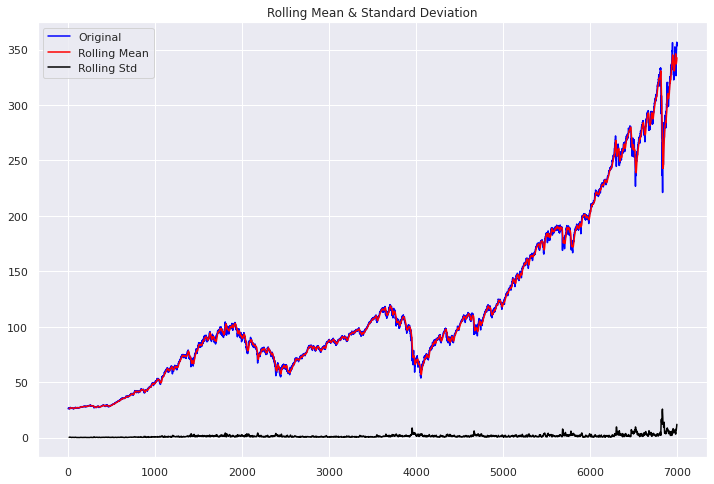

Results of Dickey-Fuller Test:
p-value = 0.9981. The series is likely non-stationary.
Test Statistic                    1.699557
p-value                           0.998128
#Lags Used                       18.000000
Number of Observations Used    6981.000000
Critical Value (1%)              -3.431287
Critical Value (5%)              -2.861954
Critical Value (10%)             -2.566990
dtype: float64


In [ ]:
test_stationarity(series)

As p>>>>>>>>>>>>>>0.05 thus the time series is non stationary and we must convert it into stationary data with using differencing method


In [ ]:
# Get the difference of each Adj Close point
tsla_close_diff_1 = series.diff()
tsla_close_diff_1.dropna(inplace=True)

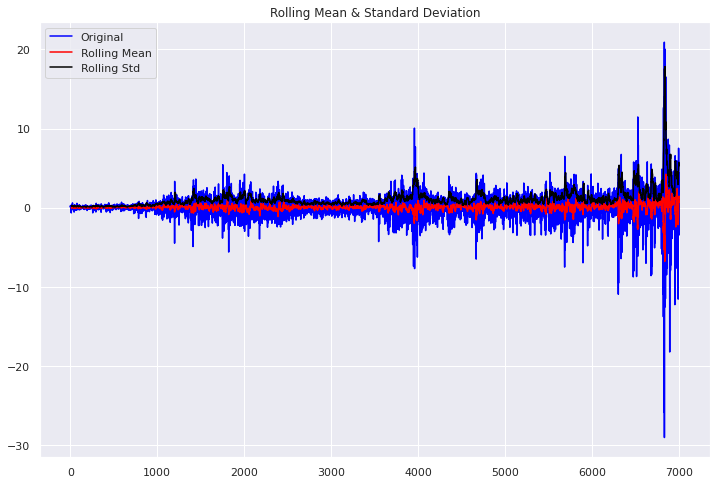

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -19.704695
p-value                           0.000000
#Lags Used                       16.000000
Number of Observations Used    6982.000000
Critical Value (1%)              -3.431287
Critical Value (5%)              -2.861954
Critical Value (10%)             -2.566990
dtype: float64


In [ ]:
# Plot the tsla Adj Close 1st order difference
test_stationarity(tsla_close_diff_1)

As now p < 0.05 thus the time series is stationary

**Autocorrelation and Partial Autocorrelation**


These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps. The difference between autocorrelation and partial autocorrelation can be difficult and confusing for beginners to time series forecasting.Autocorrelation is the correlation between points at time t (Pₜ) and the point at(Pₜ₋₁). Partial autocorrelation is the point at time t (Pₜ) and the point (Pₜ₋ₖ) where k is any number of lags. Partial autocorrelation ignores all of the data in between both points

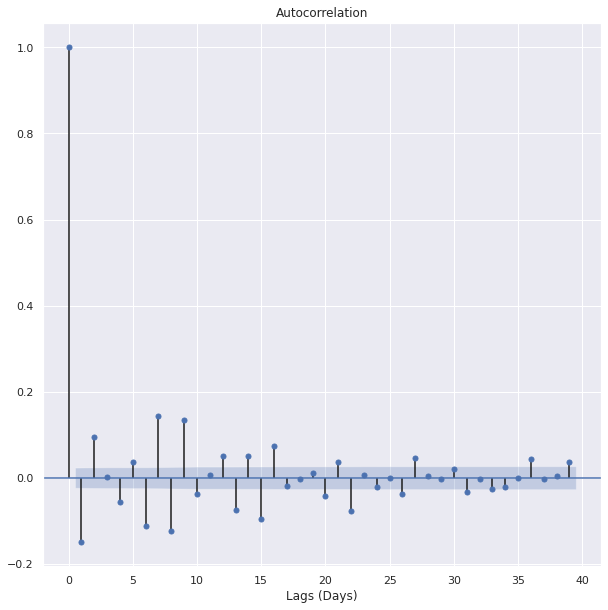

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(tsla_close_diff_1)
plt.xlabel('Lags (Days)')
plt.show()

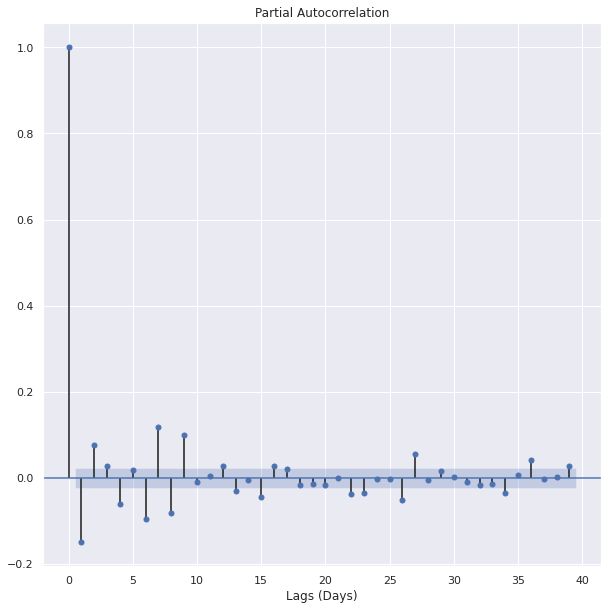

In [ ]:
plot_pacf(tsla_close_diff_1)
plt.xlabel('Lags (Days)')
plt.show()

* Let’s start with the Autocorrelation plot. The important detail of these plots is the first lag. If the first lag is positive, we use an autoregressive (AR) model, and if the first lag is negative, we use a moving average (MA) plot. Since the first lag is negative, and the 2nd lag is positive, we will use the 1st lag as a moving average point.

* For the PACF plot, since there is a substantial dropoff at lag one, which is negatively correlated, we will use an AR factor of 1 as well.The lower the AIC, the better.

* The ARIMA model takes three main inputs into the “order” argument.Those arguments are ‘p’ for the AR term, ‘d’ for the differencing term, ‘q’ for the MA term. We have determined the best model for our data is of order (1,1,1).


# Testing different ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
tsla_arima = ARIMA(x_train, order=(4,2,0))
tsla_arima_fit = tsla_arima.fit(disp=0)
print(tsla_arima_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 5520
Model:                 ARIMA(4, 2, 0)   Log Likelihood               -8420.834
Method:                       css-mle   S.D. of innovations              1.112
Date:                Sun, 28 Aug 2022   AIC                          16853.669
Time:                        15:58:30   BIC                          16893.366
Sample:                             2   HQIC                         16867.513
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0002      0.005     -0.033      0.974      -0.010       0.009
ar.L1.D2.Close    -0.8379      0.013    -63.338      0.000      -0.864      -0.812
ar.L2.D2.Close    -0.6466      0.016

NormaltestResult(statistic=1182.5425311547747, pvalue=1.6373896911621157e-257)
This distribution is not a normal distribution


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


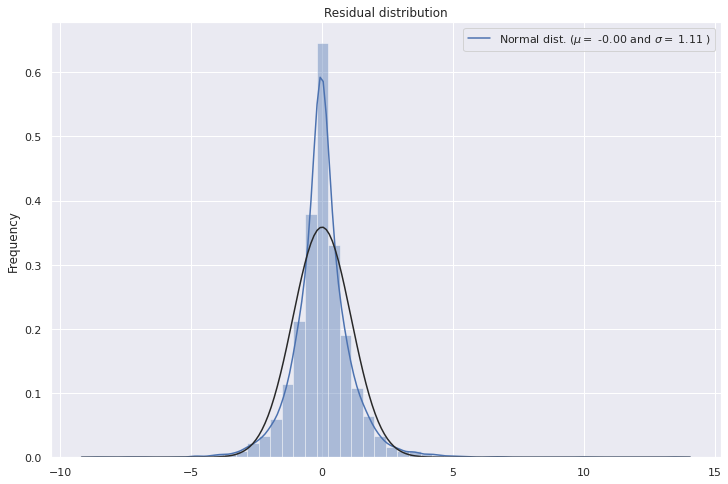

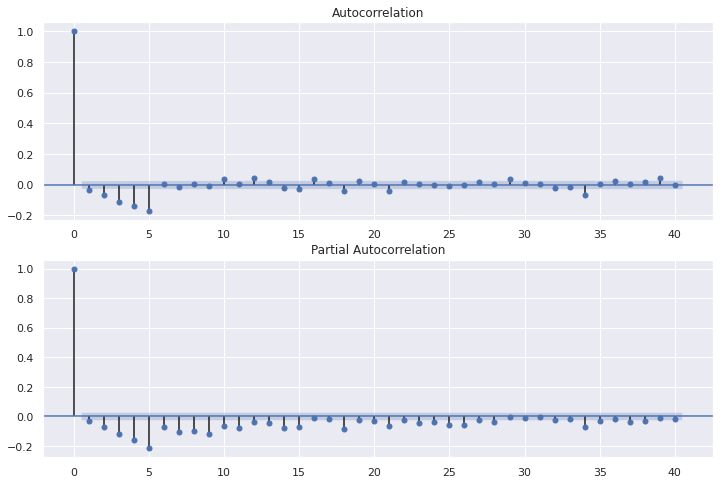

In [ ]:
from scipy import stats
import statsmodels.api as sm
from scipy.stats import normaltest

residuals = tsla_arima_fit.resid
print(normaltest(residuals))
if normaltest(residuals)[1] < .05:
    print('This distribution is not a normal distribution')
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(residuals ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(residuals)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax2)

**Building the Arima Model and Forecasting**

In [ ]:
# Create list of x train valuess
history = [x for x in x_train]

# establish list for predictions
model_predictions = []

# Count number of test data points
N_test_observations = len(x_test)

# loop through every data point
for time_point in list(x_test.index[-542:]):
    model = ARIMA(history, order=(4,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = x_test[time_point]
    history.append(true_test_value)
        
MAE_error = keras.metrics.mean_absolute_error(x_test, model_predictions).numpy()
print('Testing Mean Squared Error is {}'.format(MAE_error))

%store model_predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is [113.76011197  47.52883035  50.45727965  40.44542934  36.31080967
  34.87593571  46.36718317  44.75415116  45.9653393   47.9389533
  45.65027733  44.95591783  43.15161751  39.62400039  42.48882548
  42.83813653  42.82505175  41.18868991  43.23847735  43.24142675
  39.48282824  37.05317936  36.96729356  34.9663763   33.92278589
  34.81418815  37.47063722  37.52230396  37.6920864   34.77435475
  33.54073251  33.626549    31.25478609  30.75571118  30.76707457
  31.59967861  30.35513396  30.32286688  30.52462731  30.66437057
  31.01449318  29.96032447  30.62251801  30.98225069  32.33987889
  34.4434925   35.34672803  31.88583578  30.59389007  28.88971712
  28.58611919  27.72601407  27.41951651  27.47963209  28.22848657
  26.26701567  29.88209499  30.62334281  29.07916978  29.99756151
  29.54127097  27.61195854  25.49418841  25.36856168  25.01270035
  24.72790861  24.25552189  24.33822753  25.06564851  24.70333533
  24.78670265  24.02271632  24.00209204  23.859

In [ ]:
output

(array([359.11909897]),
 array([1.88481268]),
 array([[355.42493401, 362.81326393]]))

In [ ]:
# %store model_predictions
%store -r model_predictions

# Check to see if it reloaded
model_predictions[:5]

[array([183.32768464]),
 array([250.24164073]),
 array([247.10509911]),
 array([258.21748117]),
 array([263.12761097])]

In [ ]:
model_predictions

[array([183.32768464]),
 array([250.24164073]),
 array([247.10509911]),
 array([258.21748117]),
 array([263.12761097]),
 array([264.90010091]),
 array([251.51516249]),
 array([253.30429399]),
 array([251.9585912]),
 array([249.7956084]),
 array([252.30767394]),
 array([253.07968581]),
 array([255.09781771]),
 array([259.17460651]),
 array([255.85788871]),
 array([255.45645524]),
 array([255.47144557]),
 array([257.35563324]),
 array([254.99878911]),
 array([254.9954265]),
 array([259.34036087]),
 array([262.22563934]),
 array([262.32958317]),
 array([264.78776417]),
 array([266.09832896]),
 array([264.97679787]),
 array([261.72096743]),
 array([261.65891506]),
 array([261.45552087]),
 array([265.02627515]),
 array([266.58835395]),
 array([266.47828498]),
 array([269.57216183]),
 array([270.2481521]),
 array([270.23256047]),
 array([269.11278566]),
 array([270.81566089]),
 array([270.862094]),
 array([270.57289669]),
 array([270.37460678]),
 array([269.89588348]),
 array([271.3870214]),

In [ ]:
#save model
model_fit.save('arima_111.pkl')

# Load model
from statsmodels.tsa.arima.model import ARIMAResults
loaded = ARIMAResults.load('arima_111.pkl')

In [ ]:
model_predictions = np.array(model_predictions).flatten()

# Calculate MAE
arima_mae = keras.metrics.mean_absolute_error(x_test, model_predictions).numpy()

# Save to our dictionary of model mae scores
model_mae_scores['ARIMA'] = arima_mae
model_mae_scores

{'naive': 2.8301271186440666,
 'SMA 20': 15.930386652542373,
 'SMA 5': 7.069838983050845,
 'ARIMA': 3.2699282860569827}

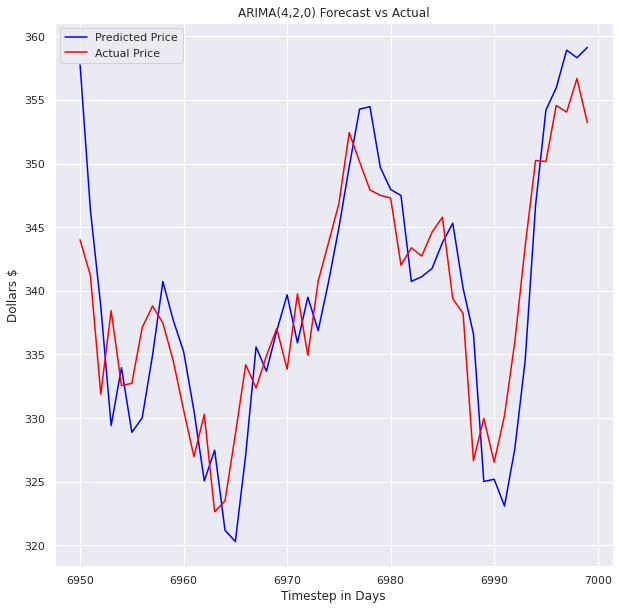

<Figure size 720x432 with 0 Axes>

In [ ]:
# Plot our predictions against the actual values for a visual comparison.
plt.plot(x_test.index[-50:], model_predictions[-50:], color='blue',label='Predicted Price')
plt.plot(x_test.index[-50:], x_test[-50:], color='red', label='Actual Price')
plt.ylabel('Dollars $')
plt.xlabel('Timestep in Days')
plt.title('ARIMA(4,2,0) Forecast vs Actual')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.figure(figsize=(10,6))
plt.show()

**Error in model vs actual**

In [ ]:
# Find the Error in the ARIMA Model
arima_error = model_predictions - x_test

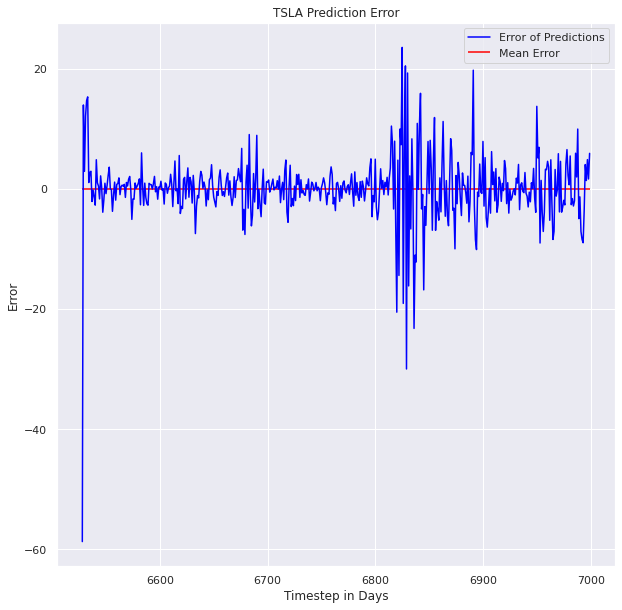

<Figure size 720x432 with 0 Axes>

In [ ]:
plt.plot(x_test.index, arima_error, color='blue',label='Error of Predictions')
plt.hlines(np.mean(arima_error),xmin=x_test.index.min(),xmax=x_test.index.max(), color = 'red', label = 'Mean Error')
# plt.plot(x_valid.index, x_valid, color='red', label='Actual Price')
plt.title('TSLA Prediction Error')
plt.xlabel('Timestep in Days')
plt.ylabel('Error')
plt.legend()
plt.figure(figsize=(10,6))
plt.show()

# LSTM


In [ ]:
# Reshape values
x_train_values = x_train.values.reshape(-1, 1)
x_valid_values = x_valid.values.reshape(-1, 1)
x_test_values = x_test.values.reshape(-1, 1)

#  Create Scaler Object
x_train_scaler = MinMaxScaler(feature_range=(0, 1))

# Fit x_train values
normalized_x_train = x_train_scaler.fit_transform(x_train_values)

# Fit x_valid values
normalized_x_valid = x_train_scaler.transform(x_valid_values)

# Fit x_test values
normalized_x_test = x_train_scaler.transform(x_test_values)

# All values normalized to training data
spy_normalized_to_traindata = x_train_scaler.transform(series.values.reshape(-1, 1))

# Example of how to iverse
# inversed = scaler.inverse_transform(normalized_x_train).flatten()

In [ ]:
class ResetStatesCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

**Finding** **Learning Rate**

In [ ]:
# reset any stored data
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# Set window size and create input batch sequences
window_size = 20
train_set = sequential_window_dataset(normalized_x_train, window_size)

# create model
model = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, stateful=True,
                    batch_input_shape=[1, None, 1]),
  keras.layers.LSTM(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
])

# create lr
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 20))
reset_states = ResetStatesCallback()

# choose optimizer
optimizer = keras.optimizers.Nadam(lr=1e-5)

# compile model
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# set history
history = model.fit(train_set, epochs=100,
                    callbacks=[lr_schedule, reset_states])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


276/276 [==============================] - 9s 17ms/step - loss: 0.0109 - mae: 0.1198 - lr: 1.0000e-05
Epoch 2/100
276/276 [==============================] - 4s 16ms/step - loss: 7.1159e-04 - mae: 0.0270 - lr: 1.1220e-05
Epoch 3/100
276/276 [==============================] - 7s 27ms/step - loss: 4.6601e-04 - mae: 0.0222 - lr: 1.2589e-05
Epoch 4/100
276/276 [==============================] - 10s 36ms/step - loss: 3.1449e-04 - mae: 0.0189 - lr: 1.4125e-05
Epoch 5/100
276/276 [==============================] - 7s 27ms/step - loss: 2.2679e-04 - mae: 0.0165 - lr: 1.5849e-05
Epoch 6/100
276/276 [==============================] - 6s 21ms/step - loss: 1.8071e-04 - mae: 0.0150 - lr: 1.7783e-05
Epoch 7/100
276/276 [==============================] - 6s 23ms/step - loss: 1.5779e-04 - mae: 0.0139 - lr: 1.9953e-05
Epoch 8/100
276/276 [==============================] - 6s 21ms/step - loss: 1.4622e-04 - mae: 0.0133 - lr: 2.2387e-05
Epoch 9/100
276/276 [==============================] - 4s 16ms/step - l

(1e-08, 1.0, 0.0, 0.01)

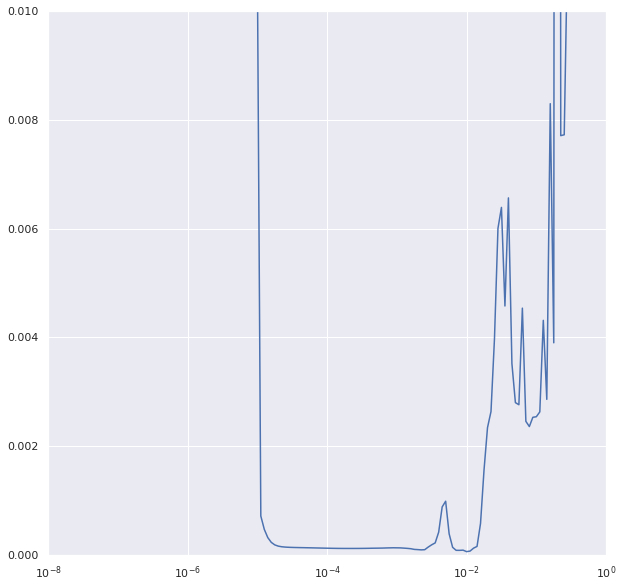

In [ ]:
# Plot the learning rate chart
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1, 0, 0.01])

**Build and Train LSTM Model**

In [218]:
# reset any stored data
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# set window size and create input batch sequence
window_size = 30
train_set = sequential_window_dataset(normalized_x_train, window_size)
valid_set = sequential_window_dataset(normalized_x_valid, window_size)

# create model
model = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, stateful=True,
                         batch_input_shape=[1, None, 1]),
  keras.layers.LSTM(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
])

# set optimizer
optimizer = keras.optimizers.Nadam(lr=1e-4)

# compile model
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# reset states
reset_states = ResetStatesCallback()

#set up save best only checkpoint
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint", save_best_only=True)

early_stopping = keras.callbacks.EarlyStopping(patience=50)

# fit model
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint, reset_states])

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


    183/Unknown - 66s 19ms/step - loss: 1.9757e-04 - mae: 0.0144

184/184 [==============================] - 76s 74ms/step - loss: 1.9734e-04 - mae: 0.0144 - val_loss: 0.0045 - val_mae: 0.0720
Epoch 2/500
182/184 [============================>.] - ETA: 0s - loss: 3.0374e-04 - mae: 0.0161

184/184 [==============================] - 16s 85ms/step - loss: 3.0364e-04 - mae: 0.0162 - val_loss: 0.0020 - val_mae: 0.0469
Epoch 3/500
183/184 [============================>.] - ETA: 0s - loss: 1.3081e-04 - mae: 0.0119

184/184 [==============================] - 13s 70ms/step - loss: 1.3150e-04 - mae: 0.0120 - val_loss: 0.0011 - val_mae: 0.0362
Epoch 4/500
184/184 [==============================] - ETA: 0s - loss: 1.1313e-04 - mae: 0.0109

184/184 [==============================] - 13s 72ms/step - loss: 1.1313e-04 - mae: 0.0109 - val_loss: 9.3169e-04 - val_mae: 0.0336
Epoch 5/500
183/184 [============================>.] - ETA: 0s - loss: 1.0710e-04 - mae: 0.0105

184/184 [==============================] - 12s 68ms/step - loss: 1.0803e-04 - mae: 0.0106 - val_loss: 8.6423e-04 - val_mae: 0.0324
Epoch 6/500
184/184 [==============================] - ETA: 0s - loss: 1.0382e-04 - mae: 0.0103

184/184 [==============================] - 13s 72ms/step - loss: 1.0382e-04 - mae: 0.0103 - val_loss: 8.3247e-04 - val_mae: 0.0316
Epoch 7/500
183/184 [============================>.] - ETA: 0s - loss: 9.9158e-05 - mae: 0.0101

184/184 [==============================] - 13s 71ms/step - loss: 9.9913e-05 - mae: 0.0101 - val_loss: 8.1613e-04 - val_mae: 0.0310
Epoch 8/500
183/184 [============================>.] - ETA: 0s - loss: 9.5580e-05 - mae: 0.0099

184/184 [==============================] - 13s 71ms/step - loss: 9.6270e-05 - mae: 0.0099 - val_loss: 8.0837e-04 - val_mae: 0.0306
Epoch 9/500
183/184 [============================>.] - ETA: 0s - loss: 9.2230e-05 - mae: 0.0097

184/184 [==============================] - 12s 66ms/step - loss: 9.2870e-05 - mae: 0.0098 - val_loss: 8.0612e-04 - val_mae: 0.0304
Epoch 10/500
184/184 [==============================] - 4s 20ms/step - loss: 8.9694e-05 - mae: 0.0096 - val_loss: 8.0729e-04 - val_mae: 0.0302
Epoch 11/500
184/184 [==============================] - 4s 20ms/step - loss: 8.6731e-05 - mae: 0.0094 - val_loss: 8.0900e-04 - val_mae: 0.0301
Epoch 12/500
184/184 [==============================] - ETA: 0s - loss: 8.3984e-05 - mae: 0.0093

184/184 [==============================] - 13s 73ms/step - loss: 8.3984e-05 - mae: 0.0093 - val_loss: 8.0605e-04 - val_mae: 0.0300
Epoch 13/500
183/184 [============================>.] - ETA: 0s - loss: 8.0889e-05 - mae: 0.0091

184/184 [==============================] - 13s 71ms/step - loss: 8.1469e-05 - mae: 0.0091 - val_loss: 7.9131e-04 - val_mae: 0.0297
Epoch 14/500
183/184 [============================>.] - ETA: 0s - loss: 7.8605e-05 - mae: 0.0090

184/184 [==============================] - 13s 71ms/step - loss: 7.9206e-05 - mae: 0.0090 - val_loss: 7.6034e-04 - val_mae: 0.0292
Epoch 15/500
182/184 [============================>.] - ETA: 0s - loss: 7.5247e-05 - mae: 0.0088

184/184 [==============================] - 12s 67ms/step - loss: 7.7189e-05 - mae: 0.0089 - val_loss: 7.1837e-04 - val_mae: 0.0285
Epoch 16/500
184/184 [==============================] - ETA: 0s - loss: 7.5358e-05 - mae: 0.0088

184/184 [==============================] - 13s 73ms/step - loss: 7.5358e-05 - mae: 0.0088 - val_loss: 6.7749e-04 - val_mae: 0.0279
Epoch 17/500
183/184 [============================>.] - ETA: 0s - loss: 7.2943e-05 - mae: 0.0086

184/184 [==============================] - 13s 72ms/step - loss: 7.3628e-05 - mae: 0.0086 - val_loss: 6.4528e-04 - val_mae: 0.0273
Epoch 18/500
183/184 [============================>.] - ETA: 0s - loss: 7.1264e-05 - mae: 0.0085

184/184 [==============================] - 14s 74ms/step - loss: 7.1962e-05 - mae: 0.0085 - val_loss: 6.1982e-04 - val_mae: 0.0269
Epoch 19/500
182/184 [============================>.] - ETA: 0s - loss: 6.8506e-05 - mae: 0.0083

184/184 [==============================] - 12s 68ms/step - loss: 7.0384e-05 - mae: 0.0084 - val_loss: 5.9831e-04 - val_mae: 0.0264
Epoch 20/500
184/184 [==============================] - ETA: 0s - loss: 6.8902e-05 - mae: 0.0083

184/184 [==============================] - 13s 72ms/step - loss: 6.8902e-05 - mae: 0.0083 - val_loss: 5.7898e-04 - val_mae: 0.0261
Epoch 21/500
184/184 [==============================] - ETA: 0s - loss: 6.7516e-05 - mae: 0.0082

184/184 [==============================] - 13s 70ms/step - loss: 6.7516e-05 - mae: 0.0082 - val_loss: 5.6121e-04 - val_mae: 0.0257
Epoch 22/500
184/184 [==============================] - ETA: 0s - loss: 6.6221e-05 - mae: 0.0082

184/184 [==============================] - 13s 71ms/step - loss: 6.6221e-05 - mae: 0.0082 - val_loss: 5.4462e-04 - val_mae: 0.0254
Epoch 23/500
183/184 [============================>.] - ETA: 0s - loss: 6.4282e-05 - mae: 0.0080

184/184 [==============================] - 12s 67ms/step - loss: 6.5012e-05 - mae: 0.0081 - val_loss: 5.2935e-04 - val_mae: 0.0251
Epoch 24/500
184/184 [==============================] - ETA: 0s - loss: 6.3880e-05 - mae: 0.0080

184/184 [==============================] - 13s 73ms/step - loss: 6.3880e-05 - mae: 0.0080 - val_loss: 5.1501e-04 - val_mae: 0.0247
Epoch 25/500
183/184 [============================>.] - ETA: 0s - loss: 6.2084e-05 - mae: 0.0079

184/184 [==============================] - 13s 71ms/step - loss: 6.2820e-05 - mae: 0.0079 - val_loss: 5.0217e-04 - val_mae: 0.0245
Epoch 26/500
183/184 [============================>.] - ETA: 0s - loss: 6.1081e-05 - mae: 0.0078

184/184 [==============================] - 13s 71ms/step - loss: 6.1821e-05 - mae: 0.0079 - val_loss: 4.8987e-04 - val_mae: 0.0242
Epoch 27/500
183/184 [============================>.] - ETA: 0s - loss: 6.0148e-05 - mae: 0.0078

184/184 [==============================] - 13s 68ms/step - loss: 6.0887e-05 - mae: 0.0078 - val_loss: 4.7923e-04 - val_mae: 0.0240
Epoch 28/500
183/184 [============================>.] - ETA: 0s - loss: 5.9257e-05 - mae: 0.0077

184/184 [==============================] - 13s 72ms/step - loss: 6.0001e-05 - mae: 0.0078 - val_loss: 4.6827e-04 - val_mae: 0.0237
Epoch 29/500
184/184 [==============================] - ETA: 0s - loss: 5.9182e-05 - mae: 0.0077

184/184 [==============================] - 13s 70ms/step - loss: 5.9182e-05 - mae: 0.0077 - val_loss: 4.5979e-04 - val_mae: 0.0235
Epoch 30/500
183/184 [============================>.] - ETA: 0s - loss: 5.7636e-05 - mae: 0.0076

184/184 [==============================] - 13s 71ms/step - loss: 5.8387e-05 - mae: 0.0077 - val_loss: 4.4905e-04 - val_mae: 0.0233
Epoch 31/500
182/184 [============================>.] - ETA: 0s - loss: 5.6118e-05 - mae: 0.0075

184/184 [==============================] - 13s 71ms/step - loss: 5.7680e-05 - mae: 0.0076 - val_loss: 4.4369e-04 - val_mae: 0.0231
Epoch 32/500
182/184 [============================>.] - ETA: 0s - loss: 5.5341e-05 - mae: 0.0075

184/184 [==============================] - 12s 67ms/step - loss: 5.6937e-05 - mae: 0.0076 - val_loss: 4.3100e-04 - val_mae: 0.0230
Epoch 33/500
184/184 [==============================] - 4s 20ms/step - loss: 5.6375e-05 - mae: 0.0075 - val_loss: 4.3392e-04 - val_mae: 0.0227
Epoch 34/500
184/184 [==============================] - ETA: 0s - loss: 5.5583e-05 - mae: 0.0075

184/184 [==============================] - 13s 73ms/step - loss: 5.5583e-05 - mae: 0.0075 - val_loss: 4.1743e-04 - val_mae: 0.0231
Epoch 35/500
184/184 [==============================] - 4s 20ms/step - loss: 5.5422e-05 - mae: 0.0075 - val_loss: 4.6716e-04 - val_mae: 0.0229
Epoch 36/500
184/184 [==============================] - 4s 20ms/step - loss: 5.4276e-05 - mae: 0.0074 - val_loss: 4.7936e-04 - val_mae: 0.0259
Epoch 37/500
184/184 [==============================] - 4s 21ms/step - loss: 5.6394e-05 - mae: 0.0075 - val_loss: 9.0988e-04 - val_mae: 0.0335
Epoch 38/500
184/184 [==============================] - 4s 20ms/step - loss: 5.1628e-05 - mae: 0.0073 - val_loss: 5.0566e-04 - val_mae: 0.0266
Epoch 39/500
184/184 [==============================] - 4s 20ms/step - loss: 5.7238e-05 - mae: 0.0077 - val_loss: 9.0130e-04 - val_mae: 0.0331
Epoch 40/500
184/184 [==============================] - 4s 20ms/step - loss: 5.0096e-05 - mae: 0.0072 - val_loss: 4.8549e-04 - val_mae: 0.0256
Epoch 41/50

184/184 [==============================] - 13s 72ms/step - loss: 4.5589e-05 - mae: 0.0069 - val_loss: 4.0163e-04 - val_mae: 0.0232
Epoch 55/500
184/184 [==============================] - 4s 20ms/step - loss: 4.8332e-05 - mae: 0.0070 - val_loss: 4.4282e-04 - val_mae: 0.0220
Epoch 56/500
183/184 [============================>.] - ETA: 0s - loss: 4.4014e-05 - mae: 0.0068

184/184 [==============================] - 12s 67ms/step - loss: 4.4895e-05 - mae: 0.0068 - val_loss: 3.8532e-04 - val_mae: 0.0227
Epoch 57/500
184/184 [==============================] - 4s 20ms/step - loss: 4.7510e-05 - mae: 0.0070 - val_loss: 4.1062e-04 - val_mae: 0.0212
Epoch 58/500
184/184 [==============================] - ETA: 0s - loss: 4.4178e-05 - mae: 0.0068

184/184 [==============================] - 13s 72ms/step - loss: 4.4178e-05 - mae: 0.0068 - val_loss: 3.6951e-04 - val_mae: 0.0222
Epoch 59/500
184/184 [==============================] - 4s 20ms/step - loss: 4.6728e-05 - mae: 0.0069 - val_loss: 3.8189e-04 - val_mae: 0.0205
Epoch 60/500
183/184 [============================>.] - ETA: 0s - loss: 4.2624e-05 - mae: 0.0066

184/184 [==============================] - 13s 70ms/step - loss: 4.3447e-05 - mae: 0.0067 - val_loss: 3.5431e-04 - val_mae: 0.0217
Epoch 61/500
184/184 [==============================] - 4s 20ms/step - loss: 4.5988e-05 - mae: 0.0068 - val_loss: 3.5614e-04 - val_mae: 0.0198
Epoch 62/500
183/184 [============================>.] - ETA: 0s - loss: 4.1905e-05 - mae: 0.0066

184/184 [==============================] - 13s 71ms/step - loss: 4.2707e-05 - mae: 0.0066 - val_loss: 3.4015e-04 - val_mae: 0.0213
Epoch 63/500
183/184 [============================>.] - ETA: 0s - loss: 4.4884e-05 - mae: 0.0068

184/184 [==============================] - 12s 67ms/step - loss: 4.5299e-05 - mae: 0.0068 - val_loss: 3.3296e-04 - val_mae: 0.0192
Epoch 64/500
183/184 [============================>.] - ETA: 0s - loss: 4.1171e-05 - mae: 0.0065

184/184 [==============================] - 13s 72ms/step - loss: 4.1959e-05 - mae: 0.0066 - val_loss: 3.2732e-04 - val_mae: 0.0209
Epoch 65/500
184/184 [==============================] - ETA: 0s - loss: 4.4667e-05 - mae: 0.0067

184/184 [==============================] - 13s 71ms/step - loss: 4.4667e-05 - mae: 0.0067 - val_loss: 3.1186e-04 - val_mae: 0.0186
Epoch 66/500
184/184 [==============================] - 4s 20ms/step - loss: 4.1202e-05 - mae: 0.0065 - val_loss: 3.1609e-04 - val_mae: 0.0206
Epoch 67/500
184/184 [==============================] - ETA: 0s - loss: 4.4095e-05 - mae: 0.0067

184/184 [==============================] - 13s 70ms/step - loss: 4.4095e-05 - mae: 0.0067 - val_loss: 2.9241e-04 - val_mae: 0.0180
Epoch 68/500
184/184 [==============================] - 4s 20ms/step - loss: 4.0441e-05 - mae: 0.0064 - val_loss: 3.0659e-04 - val_mae: 0.0203
Epoch 69/500
183/184 [============================>.] - ETA: 0s - loss: 4.3206e-05 - mae: 0.0067

184/184 [==============================] - 13s 70ms/step - loss: 4.3583e-05 - mae: 0.0067 - val_loss: 2.7431e-04 - val_mae: 0.0175
Epoch 70/500
184/184 [==============================] - 4s 20ms/step - loss: 3.9677e-05 - mae: 0.0064 - val_loss: 2.9864e-04 - val_mae: 0.0201
Epoch 71/500
184/184 [==============================] - ETA: 0s - loss: 4.3123e-05 - mae: 0.0067

184/184 [==============================] - 12s 66ms/step - loss: 4.3123e-05 - mae: 0.0067 - val_loss: 2.5706e-04 - val_mae: 0.0169
Epoch 72/500
184/184 [==============================] - 4s 20ms/step - loss: 3.8919e-05 - mae: 0.0063 - val_loss: 2.9171e-04 - val_mae: 0.0199
Epoch 73/500
184/184 [==============================] - ETA: 0s - loss: 4.2693e-05 - mae: 0.0066

184/184 [==============================] - 13s 72ms/step - loss: 4.2693e-05 - mae: 0.0066 - val_loss: 2.3991e-04 - val_mae: 0.0163
Epoch 74/500
184/184 [==============================] - 4s 20ms/step - loss: 3.8180e-05 - mae: 0.0062 - val_loss: 2.8554e-04 - val_mae: 0.0197
Epoch 75/500
182/184 [============================>.] - ETA: 0s - loss: 4.1625e-05 - mae: 0.0066

184/184 [==============================] - 13s 71ms/step - loss: 4.2275e-05 - mae: 0.0066 - val_loss: 2.2214e-04 - val_mae: 0.0157
Epoch 76/500
184/184 [==============================] - 4s 20ms/step - loss: 3.7474e-05 - mae: 0.0062 - val_loss: 2.8026e-04 - val_mae: 0.0196
Epoch 77/500
184/184 [==============================] - ETA: 0s - loss: 4.1860e-05 - mae: 0.0066

184/184 [==============================] - 12s 67ms/step - loss: 4.1860e-05 - mae: 0.0066 - val_loss: 2.0347e-04 - val_mae: 0.0150
Epoch 78/500
184/184 [==============================] - 4s 20ms/step - loss: 3.6803e-05 - mae: 0.0061 - val_loss: 2.7636e-04 - val_mae: 0.0194
Epoch 79/500
183/184 [============================>.] - ETA: 0s - loss: 4.1137e-05 - mae: 0.0066

184/184 [==============================] - 13s 72ms/step - loss: 4.1449e-05 - mae: 0.0066 - val_loss: 1.8406e-04 - val_mae: 0.0143
Epoch 80/500
184/184 [==============================] - 4s 20ms/step - loss: 3.6164e-05 - mae: 0.0060 - val_loss: 2.7433e-04 - val_mae: 0.0194
Epoch 81/500
182/184 [============================>.] - ETA: 0s - loss: 4.0459e-05 - mae: 0.0065

184/184 [==============================] - 13s 71ms/step - loss: 4.1038e-05 - mae: 0.0065 - val_loss: 1.6447e-04 - val_mae: 0.0135
Epoch 82/500
184/184 [==============================] - 4s 20ms/step - loss: 3.5551e-05 - mae: 0.0060 - val_loss: 2.7514e-04 - val_mae: 0.0195
Epoch 83/500
184/184 [==============================] - ETA: 0s - loss: 4.0624e-05 - mae: 0.0065

184/184 [==============================] - 13s 72ms/step - loss: 4.0624e-05 - mae: 0.0065 - val_loss: 1.4561e-04 - val_mae: 0.0126
Epoch 84/500
184/184 [==============================] - 4s 20ms/step - loss: 3.4960e-05 - mae: 0.0059 - val_loss: 2.8024e-04 - val_mae: 0.0197
Epoch 85/500
184/184 [==============================] - ETA: 0s - loss: 4.0209e-05 - mae: 0.0065

184/184 [==============================] - 12s 67ms/step - loss: 4.0209e-05 - mae: 0.0065 - val_loss: 1.2883e-04 - val_mae: 0.0118
Epoch 86/500
184/184 [==============================] - 4s 21ms/step - loss: 3.4390e-05 - mae: 0.0059 - val_loss: 2.9157e-04 - val_mae: 0.0202
Epoch 87/500
183/184 [============================>.] - ETA: 0s - loss: 3.9517e-05 - mae: 0.0064

184/184 [==============================] - 13s 72ms/step - loss: 3.9793e-05 - mae: 0.0065 - val_loss: 1.1606e-04 - val_mae: 0.0111
Epoch 88/500
184/184 [==============================] - 4s 20ms/step - loss: 3.3839e-05 - mae: 0.0058 - val_loss: 3.1169e-04 - val_mae: 0.0211
Epoch 89/500
184/184 [==============================] - ETA: 0s - loss: 3.9379e-05 - mae: 0.0064

184/184 [==============================] - 13s 71ms/step - loss: 3.9379e-05 - mae: 0.0064 - val_loss: 1.0978e-04 - val_mae: 0.0107
Epoch 90/500
184/184 [==============================] - 4s 20ms/step - loss: 3.3307e-05 - mae: 0.0058 - val_loss: 3.4325e-04 - val_mae: 0.0225
Epoch 91/500
184/184 [==============================] - 4s 20ms/step - loss: 3.8969e-05 - mae: 0.0064 - val_loss: 1.1285e-04 - val_mae: 0.0107
Epoch 92/500
184/184 [==============================] - 4s 20ms/step - loss: 3.2792e-05 - mae: 0.0057 - val_loss: 3.8874e-04 - val_mae: 0.0244
Epoch 93/500
184/184 [==============================] - 4s 20ms/step - loss: 3.8559e-05 - mae: 0.0064 - val_loss: 1.2830e-04 - val_mae: 0.0116
Epoch 94/500
184/184 [==============================] - 4s 20ms/step - loss: 3.2296e-05 - mae: 0.0057 - val_loss: 4.5043e-04 - val_mae: 0.0270
Epoch 95/500
184/184 [==============================] - 4s 20ms/step - loss: 3.8151e-05 - mae: 0.0063 - val_loss: 1.5882e-04 - val_mae: 0.0133
Epoch 96/50

184/184 [==============================] - 13s 71ms/step - loss: 3.9070e-05 - mae: 0.0062 - val_loss: 7.9920e-05 - val_mae: 0.0089
Epoch 122/500
184/184 [==============================] - 4s 20ms/step - loss: 2.8830e-05 - mae: 0.0053 - val_loss: 8.3846e-04 - val_mae: 0.0390
Epoch 123/500
184/184 [==============================] - 4s 20ms/step - loss: 3.7989e-05 - mae: 0.0064 - val_loss: 1.1347e-04 - val_mae: 0.0106
Epoch 124/500
184/184 [==============================] - 4s 20ms/step - loss: 3.0410e-05 - mae: 0.0057 - val_loss: 9.7894e-05 - val_mae: 0.0104
Epoch 125/500
184/184 [==============================] - 4s 20ms/step - loss: 3.4126e-05 - mae: 0.0059 - val_loss: 8.6281e-05 - val_mae: 0.0097
Epoch 126/500
184/184 [==============================] - 4s 20ms/step - loss: 2.7548e-05 - mae: 0.0053 - val_loss: 1.7883e-04 - val_mae: 0.0155
Epoch 127/500
184/184 [==============================] - 4s 20ms/step - loss: 2.9833e-05 - mae: 0.0055 - val_loss: 5.4039e-04 - val_mae: 0.0299
Epoch

184/184 [==============================] - 12s 67ms/step - loss: 2.8613e-05 - mae: 0.0055 - val_loss: 7.5716e-05 - val_mae: 0.0087
Epoch 132/500
184/184 [==============================] - 4s 20ms/step - loss: 3.0974e-05 - mae: 0.0056 - val_loss: 7.9407e-05 - val_mae: 0.0091
Epoch 133/500
184/184 [==============================] - 4s 20ms/step - loss: 2.8174e-05 - mae: 0.0054 - val_loss: 1.0011e-04 - val_mae: 0.0107
Epoch 134/500
184/184 [==============================] - 4s 20ms/step - loss: 2.7852e-05 - mae: 0.0053 - val_loss: 9.2600e-05 - val_mae: 0.0101
Epoch 135/500
184/184 [==============================] - 4s 20ms/step - loss: 2.9103e-05 - mae: 0.0054 - val_loss: 6.0220e-04 - val_mae: 0.0326
Epoch 136/500
184/184 [==============================] - 4s 20ms/step - loss: 3.3709e-05 - mae: 0.0059 - val_loss: 1.8649e-04 - val_mae: 0.0170
Epoch 137/500
184/184 [==============================] - 4s 21ms/step - loss: 2.9810e-05 - mae: 0.0057 - val_loss: 1.6279e-04 - val_mae: 0.0138
Epoch

In [219]:
# recall best model
model = keras.models.load_model("my_checkpoint")

In [220]:
# make predictions
rnn_forecast = model.predict(normalized_x_test[np.newaxis,:])
rnn_forecast = rnn_forecast.flatten()

In [221]:
# inverse
rnn_unscaled_forecast = x_train_scaler.inverse_transform(rnn_forecast.reshape(-1,1)).flatten()
rnn_unscaled_forecast.shape

(472,)

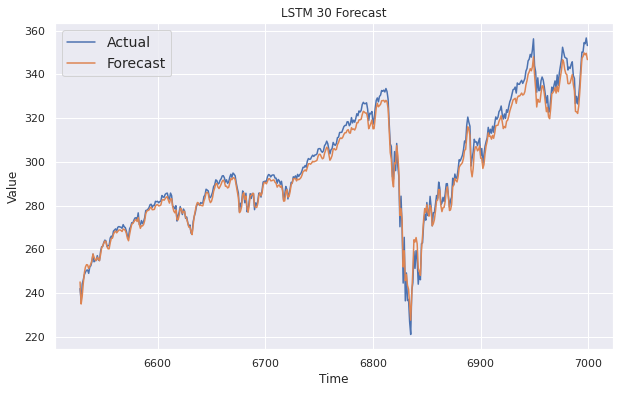

In [222]:
# plot results
plt.figure(figsize=(10,6))

plt.ylabel('Dollars $')
plt.xlabel('Timestep in Days')
plt.title(f'LSTM {window_size} Forecast')
plot_series(x_test.index, x_test, label="Actual")
plot_series(x_test.index, rnn_unscaled_forecast, label="Forecast")
plt.show()

In [223]:
# calculate MAE
lstm_30day = keras.metrics.mean_absolute_error(x_test, rnn_unscaled_forecast).numpy()

In [224]:
# Save to our dictionary of model mae scores
model_mae_scores['lstm_30day'] = lstm_30day
model_mae_scores

{'naive': 2.8301271186440666,
 'SMA 20': 15.930386652542373,
 'SMA 5': 7.069838983050845,
 'ARIMA': 3.2699282860569827,
 'lstm_30day': 2.8171883}

# Model Summary

In [225]:
%store -r model_mae_scores
mae_series = pd.Series(model_mae_scores)
model_mae_scores

no stored variable model_mae_scores


{'naive': 2.8301271186440666,
 'SMA 20': 15.930386652542373,
 'SMA 5': 7.069838983050845,
 'ARIMA': 3.2699282860569827,
 'lstm_30day': 2.8171883}

In [226]:
order = mae_series.sort_values()

Text(0.5, 1.0, 'Mean Average Error of All Models Tested')

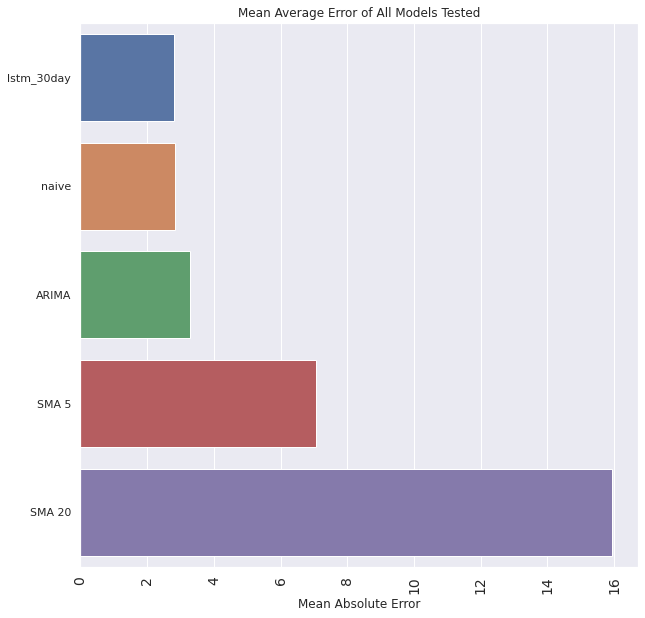

In [227]:
# Create bar chart for to show MAE of all models side by side
sns.barplot(x=order.values, y = order.index, orient='h')
plt.xlabel('Mean Absolute Error')
plt.xticks(rotation='vertical',fontsize=14)
plt.title('Mean Average Error of All Models Tested')